## Import Python Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import missingno as msno

## Loading the Datasets

In [2]:
df1 = pd.read_csv('../Datasets/goemotions_1.csv')
df1.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
df2 = pd.read_csv('../Datasets/goemotions_2.csv')
df2.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,We can hope,ee3o3ko,darkenseyreth,EdmontonOilers,t3_ag4r9j,t1_ee3mhad,1.547529e+09,62,False,0,...,0,0,1,0,0,0,0,0,0,0
1,Shhh don't give them the idea!,eebl3z7,BoinkBoinkEtAliae,MurderedByWords,t3_ah3o76,t1_eeb68lo,1.547777e+09,76,False,0,...,0,0,0,0,0,0,0,0,0,0
2,"Thank you so much, kind stranger. I really nee...",ed4fe9l,savageleaf,raisedbynarcissists,t3_abwh00,t1_ed4etbj,1.546482e+09,24,False,0,...,0,0,0,0,0,0,0,0,0,0
3,Ion know but it would be better for you to jus...,efavtdu,CADDiLLXC,darknet,t3_al4njw,t3_al4njw,1.548800e+09,62,False,0,...,0,0,0,0,0,0,0,0,0,1
4,I'm honestly surprised. We should have fallen ...,ee2imz2,CorporalThornberry,CollegeBasketball,t3_afxt6t,t1_ee22nyr,1.547497e+09,55,False,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df3 = pd.read_csv('../Datasets/goemotions_3.csv')
df3.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,Worst ending ever! I won't spoil it but this o...,eee021b,tribaltrak,movies,t3_agxbsx,t3_agxbsx,1.547847e+09,42,False,0,...,0,0,0,0,0,0,0,0,0,0
1,Happy cake day u/sneakpeekbot!,ed00f1z,InfernicFuse,danganronpa,t3_abajdo,t1_eczoocj,1.546328e+09,24,False,0,...,0,0,0,0,0,0,0,0,0,0
2,Was he rejected because of his methodology or ...,ee1h5v1,OssToYouGoodSir,medicine,t3_aflo7s,t1_ee0v0vv,1.547464e+09,77,False,0,...,0,0,0,0,0,0,0,0,0,0
3,"thanks, I agree",eemi935,PMOFreeForever,NoFap,t3_ai7h09,t1_eelu54r,1.548088e+09,46,False,0,...,0,0,0,0,0,0,0,0,0,0
4,Why would you doubt it dumbass?,eduun99,ugliestman1,Tinder,t3_aejwne,t1_edumeal,1.547255e+09,36,False,0,...,0,0,0,0,0,0,0,0,0,0


## Displaying the Number of Attributes and Records in Each Dataset

In [ ]:
print('First Dataset')
print(f'Number of Records : {df1.shape[0]}')
print(f'Number of Attributes : {df1.shape[1]}')
print()
print('Second Dataset')
print(f'Number of Records : {df2.shape[0]}')
print(f'Number of Attributes : {df2.shape[1]}')
print()
print('Third Dataset')
print(f'Number of Records : {df3.shape[0]}')
print(f'Number of Attributes : {df3.shape[1]}')

First Dataset
Number of Attributes : 70000
Number of Records : 37

Second Dataset
Number of Attributes : 70000
Number of Records : 37

Third Dataset
Number of Attributes : 71225
Number of Records : 37


## Displaying the Complete Information of the Three Datasets

#### First Dataset

In [6]:
print('Complete Information of the First Dataset')
df1.info()

Complete Information of the First Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  70000 non-null  object 
 1   id                    70000 non-null  object 
 2   author                70000 non-null  object 
 3   subreddit             70000 non-null  object 
 4   link_id               70000 non-null  object 
 5   parent_id             70000 non-null  object 
 6   created_utc           70000 non-null  float64
 7   rater_id              70000 non-null  int64  
 8   example_very_unclear  70000 non-null  bool   
 9   admiration            70000 non-null  int64  
 10  amusement             70000 non-null  int64  
 11  anger                 70000 non-null  int64  
 12  annoyance             70000 non-null  int64  
 13  approval              70000 non-null  int64  
 14  caring                70000 

#### Second Dataset

In [7]:
print('Complete Information of the Second Dataset')
df2.info()

Complete Information of the Second Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  70000 non-null  object 
 1   id                    70000 non-null  object 
 2   author                70000 non-null  object 
 3   subreddit             70000 non-null  object 
 4   link_id               70000 non-null  object 
 5   parent_id             70000 non-null  object 
 6   created_utc           70000 non-null  float64
 7   rater_id              70000 non-null  int64  
 8   example_very_unclear  70000 non-null  bool   
 9   admiration            70000 non-null  int64  
 10  amusement             70000 non-null  int64  
 11  anger                 70000 non-null  int64  
 12  annoyance             70000 non-null  int64  
 13  approval              70000 non-null  int64  
 14  caring                70000

#### Third Dataset

In [8]:
print('Complete Information of the Third Dataset')
df3.info()

Complete Information of the Third Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71225 entries, 0 to 71224
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  71225 non-null  object 
 1   id                    71225 non-null  object 
 2   author                71225 non-null  object 
 3   subreddit             71225 non-null  object 
 4   link_id               71225 non-null  object 
 5   parent_id             71225 non-null  object 
 6   created_utc           71225 non-null  float64
 7   rater_id              71225 non-null  int64  
 8   example_very_unclear  71225 non-null  bool   
 9   admiration            71225 non-null  int64  
 10  amusement             71225 non-null  int64  
 11  anger                 71225 non-null  int64  
 12  annoyance             71225 non-null  int64  
 13  approval              71225 non-null  int64  
 14  caring                71225 

## Displaying the Statistical Description of the Datasets

#### First Dataset

In [9]:
df1.describe()

,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
count,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.547656e+09,37.526686,0.080671,0.044014,0.036986,0.063471,0.084686,0.028400,0.035300,0.046671,...,0.039214,0.008543,0.041243,0.006457,0.040957,0.006457,0.012129,0.031329,0.025800,0.263186
std,7.700606e+05,23.039283,0.272332,0.205128,0.188728,0.243811,0.278415,0.166114,0.184538,0.210936,...,0.194106,0.092033,0.198853,0.080097,0.198192,0.080097,0.109461,0.174205,0.158539,0.440365
min,1.546301e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.546990e+09,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.547660e+09,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.548312e+09,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.548979e+09,81.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Second Dataset

In [10]:
df2.describe()

,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
count,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.547660e+09,37.643157,0.082471,0.043486,0.039457,0.065100,0.082643,0.028357,0.034114,0.045571,...,0.038529,0.008300,0.042229,0.006129,0.041671,0.006286,0.011986,0.031829,0.025786,0.260843
std,7.686555e+05,23.087765,0.275084,0.203949,0.194681,0.246704,0.275344,0.165992,0.181524,0.208555,...,0.192470,0.090726,0.201112,0.078045,0.199839,0.079033,0.108822,0.175545,0.158497,0.439098
min,1.546301e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.546994e+09,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.547669e+09,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.548317e+09,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.548979e+09,81.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Third Dataset

In [11]:
df3.describe()

,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
count,7.122500e+04,71225.000000,71225.000000,71225.000000,71225.000000,71225.000000,71225.000000,71225.000000,71225.000000,71225.000000,...,71225.000000,71225.000000,71225.000000,71225.000000,71225.000000,71225.000000,71225.000000,71225.000000,71225.000000,71225.000000
mean,1.547660e+09,37.688185,0.080183,0.043805,0.038371,0.064837,0.082934,0.028445,0.035100,0.045419,...,0.038596,0.008859,0.040323,0.005911,0.042134,0.005574,0.011751,0.032812,0.026718,0.261369
std,7.703268e+05,23.084289,0.271577,0.204662,0.192092,0.246239,0.275785,0.166242,0.184034,0.208224,...,0.192631,0.093706,0.196717,0.076655,0.200896,0.074451,0.107766,0.178144,0.161260,0.439384
min,1.546301e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.546994e+09,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.547665e+09,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.548330e+09,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.548979e+09,81.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Missing Values Analysis

#### First Dataset

In [12]:
df1.isnull().sum()

text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64

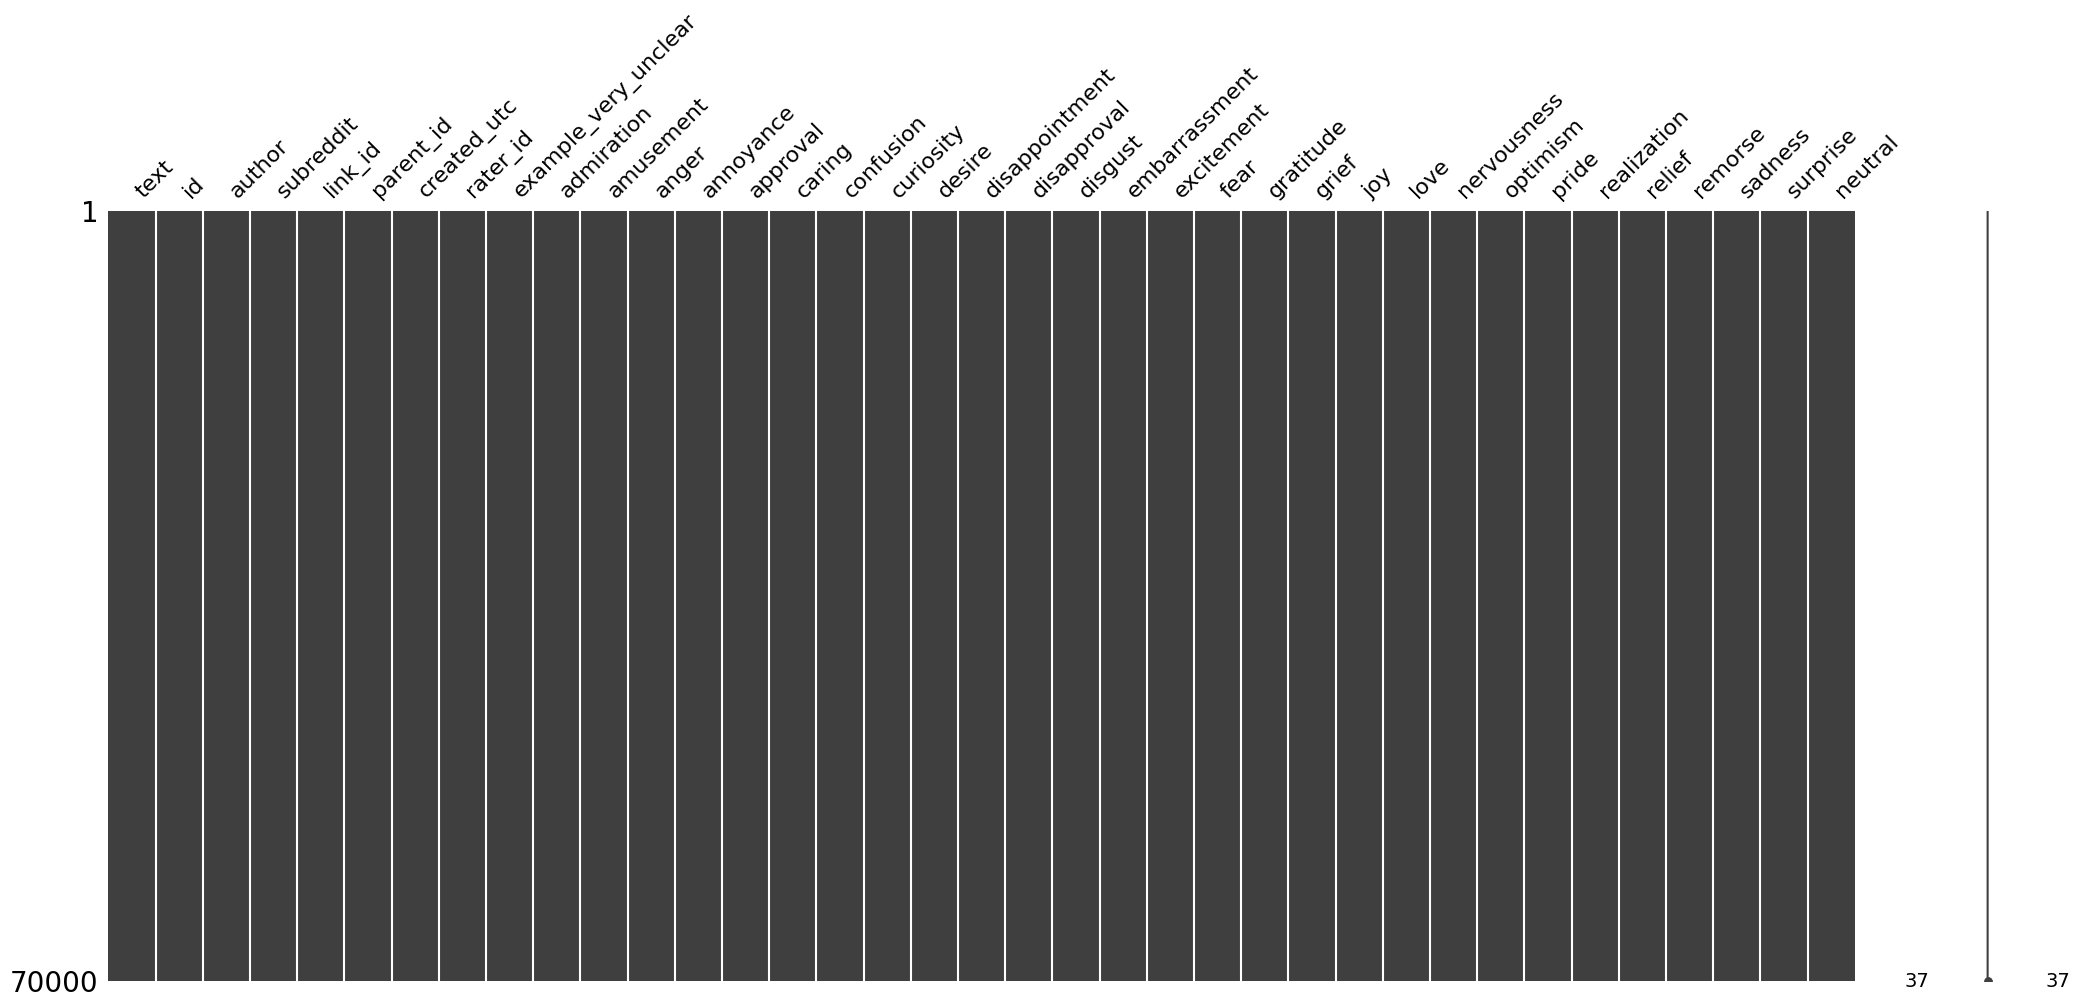

In [13]:
msno.matrix(df1)
plt.show()

#### Second Dataset

In [14]:
df2.isnull().sum()

text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64

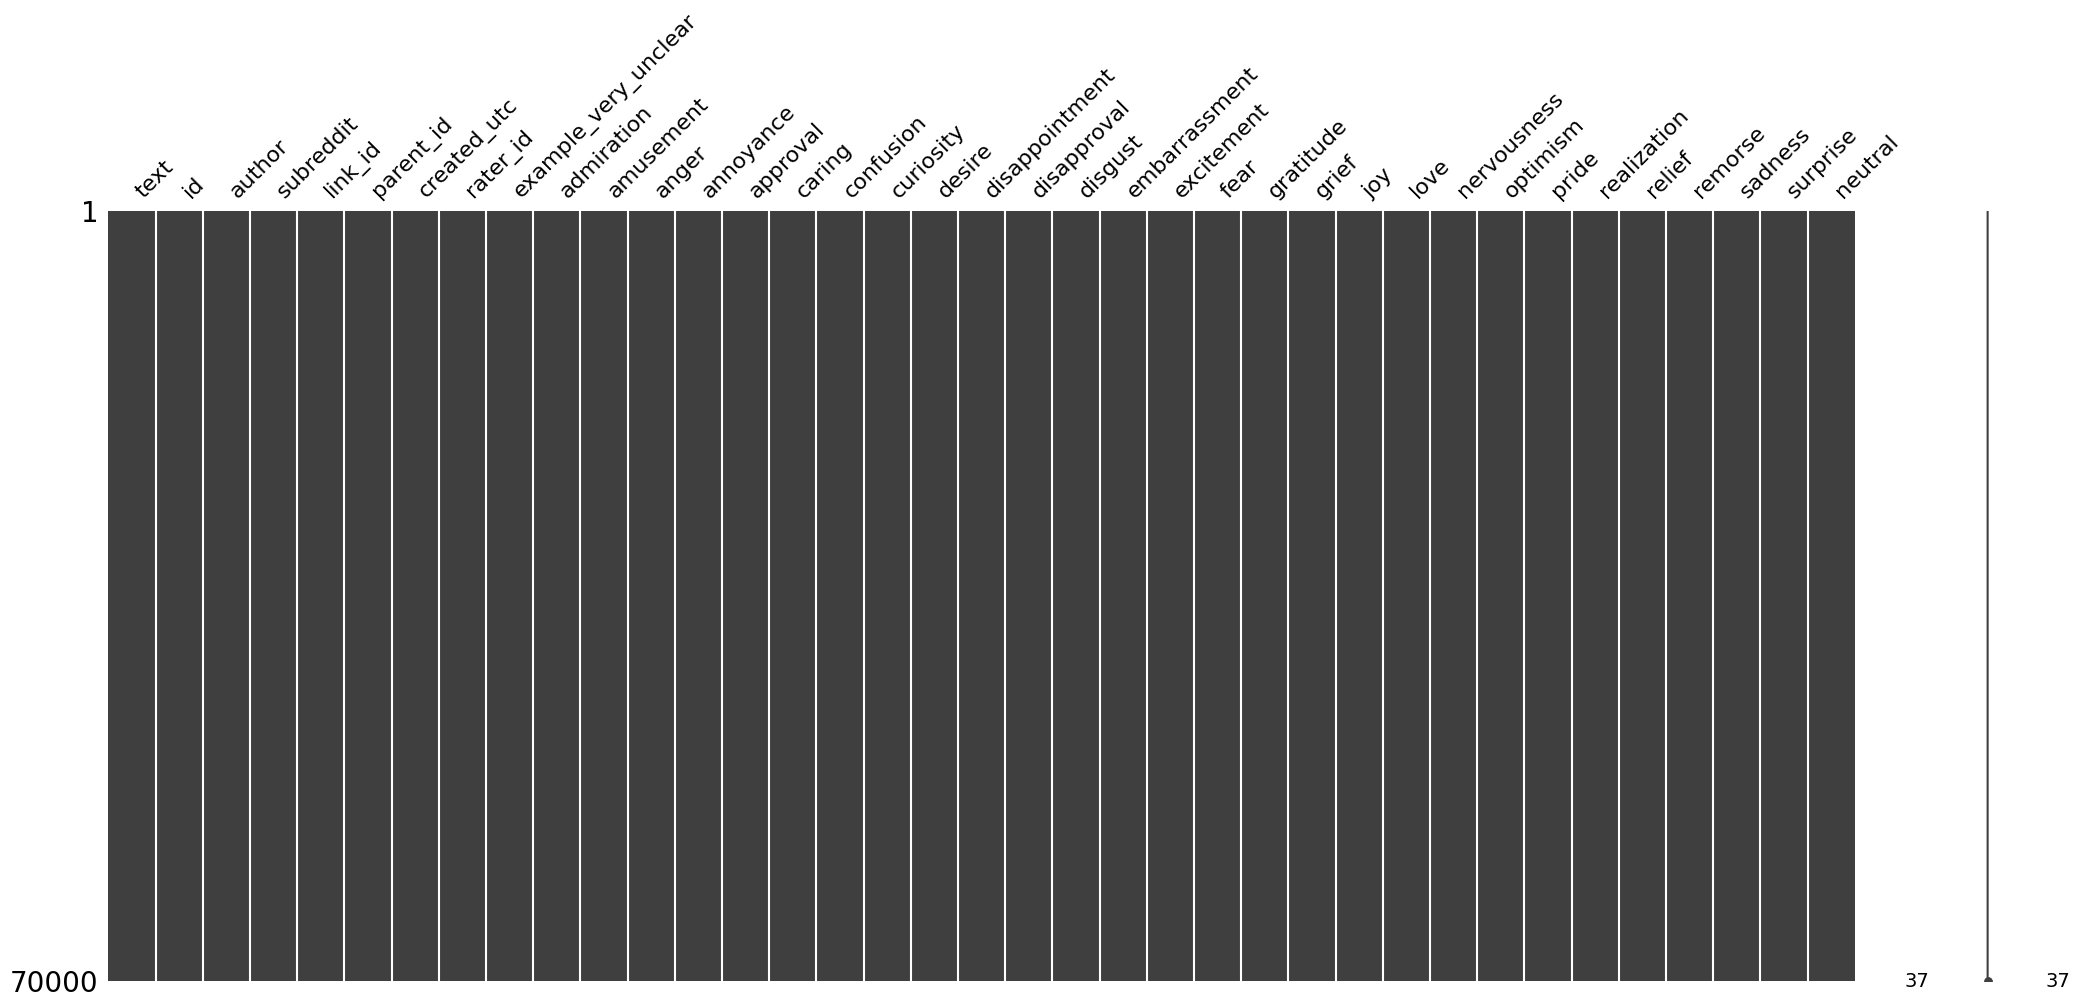

In [15]:
msno.matrix(df2)
plt.show()

#### Third Dataset

In [16]:
df3.isnull().sum()

text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64

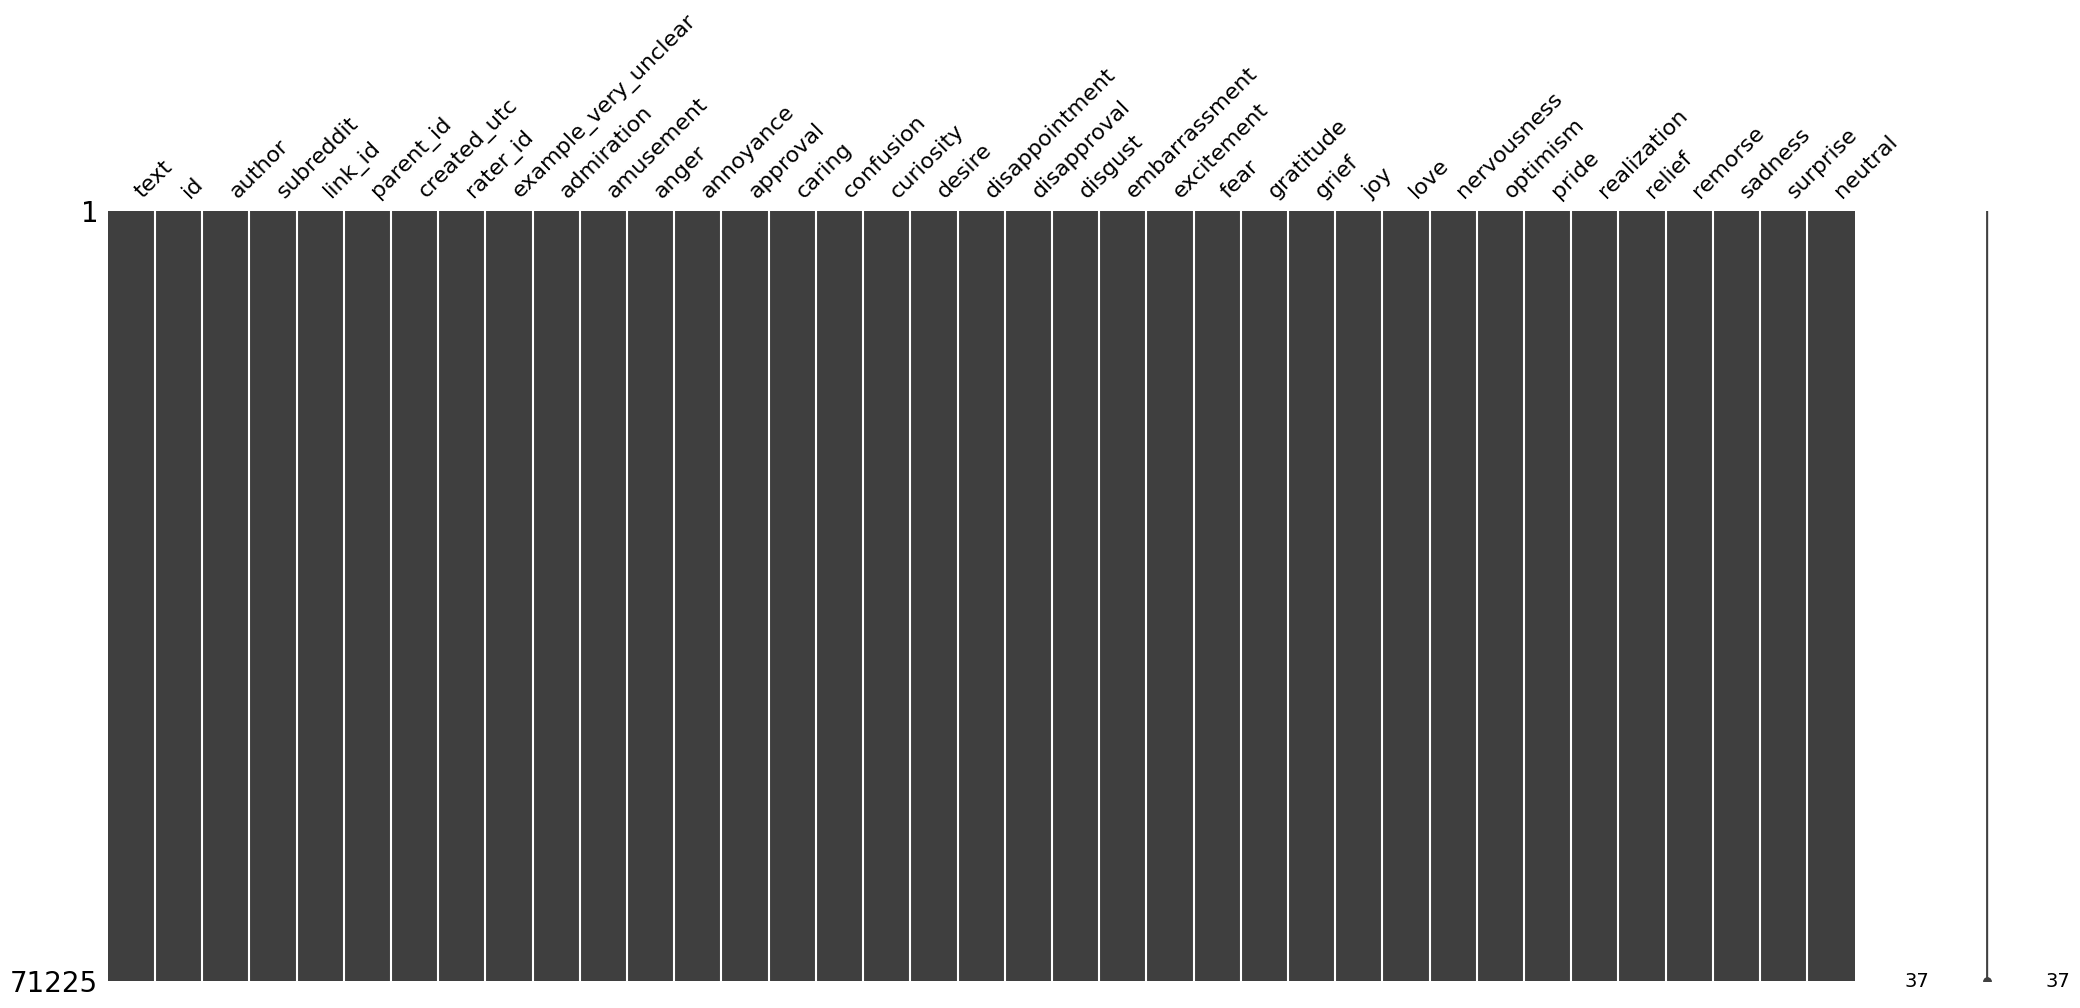

In [17]:
msno.matrix(df3)
plt.show()

## Duplicate Analysis

#### First Dataset

In [19]:
print(df1.duplicated().sum())

0


#### Second Dataset

In [20]:
print(df2.duplicated().sum())

0


#### Third Dataset

In [21]:
print(df3.duplicated().sum())

0


## Visulaization of Categorical Features

#### First Dataset


Value Counts for subreddit :
subreddit
cringe                  319
socialanxiety           303
timberwolves            292
loveafterlockup         281
AnimalsBeingBros        277
OkCupid                 275
datingoverthirty        274
nonononoyes             274
TheSimpsons             272
traaaaaaannnnnnnnnns    271
Name: count, dtype: int64


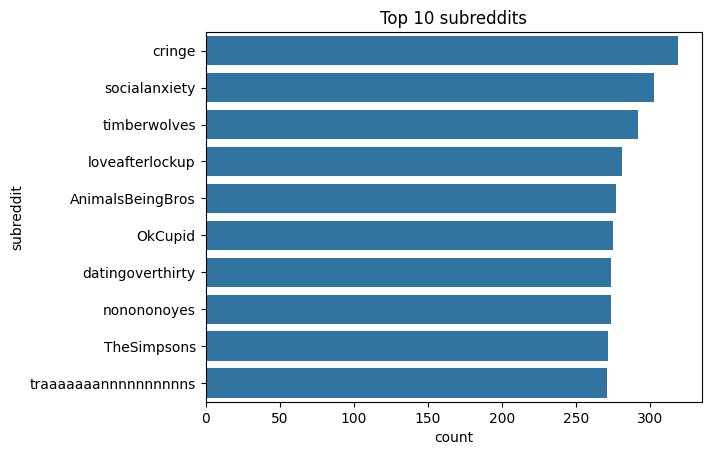


Value Counts for author :
author
[deleted]          1286
devildriver77        25
CakeDay--Bot         24
Ahren_with_an_h      21
KaliTheCat           20
krazykrash96         20
MidEEBoi             19
saturdeity           19
namer98              18
mrsj74               16
Name: count, dtype: int64


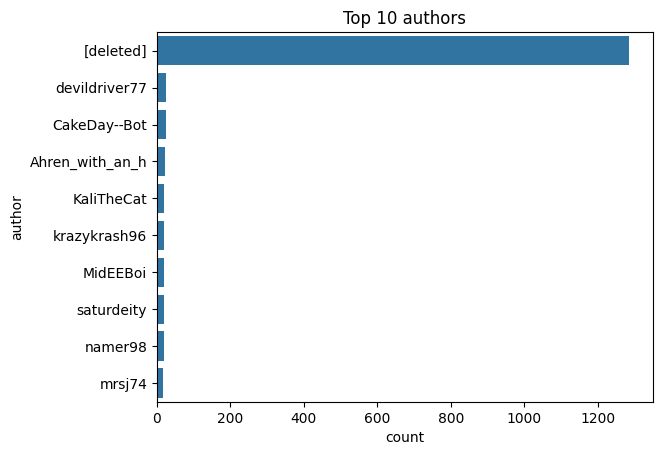

In [22]:
for col in ['subreddit','author'] :
    print(f'\nValue Counts for {col} :')
    print(df1[col].value_counts().head(10))
    sns.countplot(y=df1[col], order=df1[col].value_counts().head(10).index)
    plt.title(f'Top 10 {col}s')
    plt.show()

#### Second Dataset


Value Counts for subreddit :
subreddit
cringe                   295
loveafterlockup          295
90DayFiance              291
AnimalsBeingBros         287
confessions              282
wholesomememes           276
entitledparents          275
exmormon                 272
TeenMomOGandTeenMom2     268
90dayfianceuncensored    267
Name: count, dtype: int64


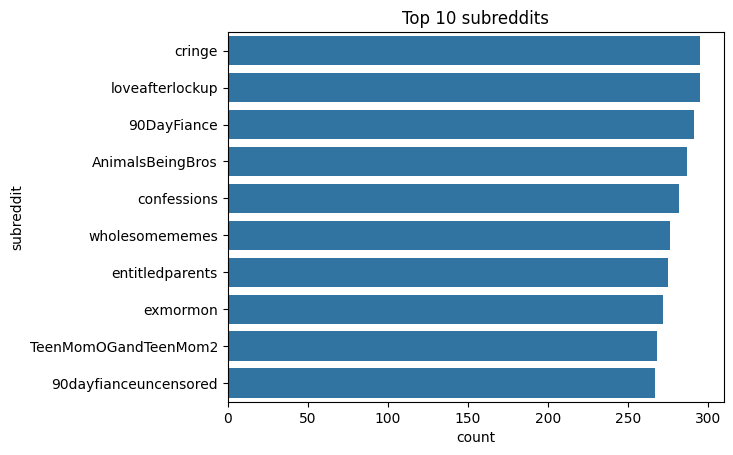


Value Counts for author :
author
[deleted]           1236
CakeDay--Bot          42
devildriver77         30
smackspr              22
FThumb                21
DetroitHooper313      21
OG-Memes              20
saturdeity            18
ishabad               18
mrsj74                17
Name: count, dtype: int64


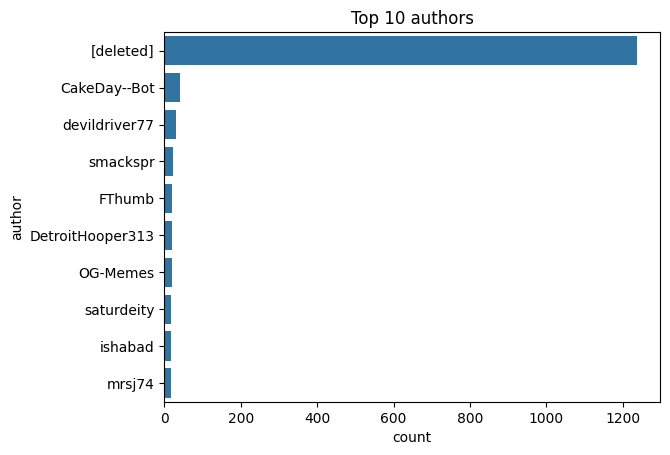

In [23]:
for col in ['subreddit','author'] :
    print(f'\nValue Counts for {col} :')
    print(df2[col].value_counts().head(10))
    sns.countplot(y=df2[col], order=df2[col].value_counts().head(10).index)
    plt.title(f'Top 10 {col}s')
    plt.show()

#### Third Dataset


Value Counts for subreddit :
subreddit
danganronpa              300
socialanxiety            298
vanderpumprules          298
loveafterlockup          294
90dayfianceuncensored    284
TheSimpsons              282
OkCupid                  281
cringe                   281
TeenMomOGandTeenMom2     275
AnimalsBeingJerks        268
Name: count, dtype: int64


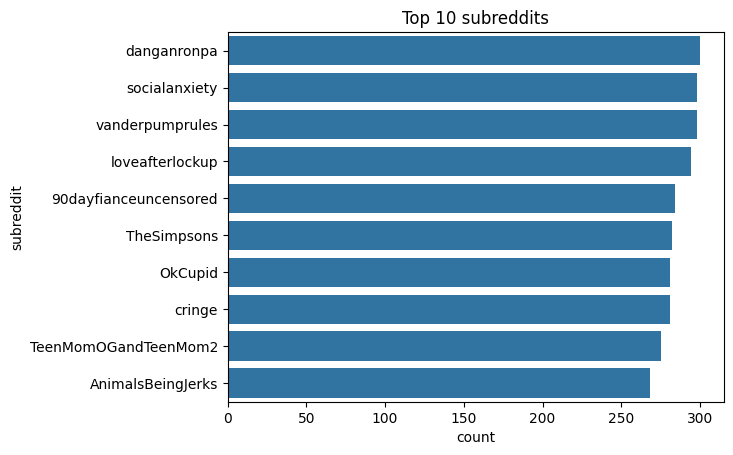


Value Counts for author :
author
[deleted]          1360
CakeDay--Bot         30
Ahren_with_an_h      25
yoeyz                24
saturdeity           20
mrsj74               20
devildriver77        19
Nodor10              18
BKtoDuval            18
MidEEBoi             17
Name: count, dtype: int64


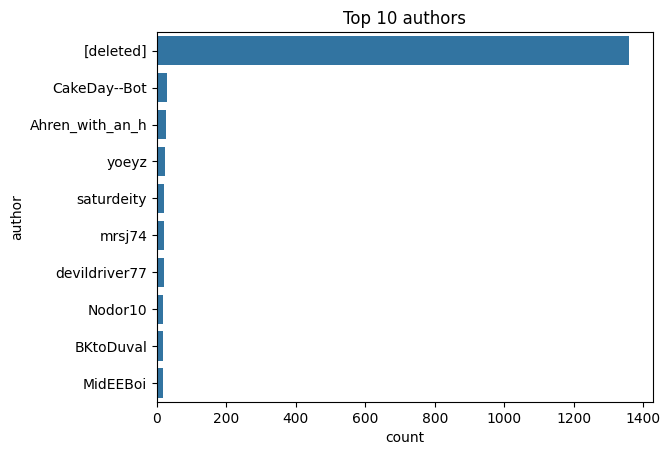

In [24]:
for col in ['subreddit','author'] :
    print(f'\nValue Counts for {col} :')
    print(df3[col].value_counts().head(10))
    sns.countplot(y=df3[col], order=df3[col].value_counts().head(10).index)
    plt.title(f'Top 10 {col}s')
    plt.show()

## Date Time Exploration

#### First Dataset

count                            70000
mean     2019-01-16 16:20:10.365499648
min                2019-01-01 00:00:19
25%      2019-01-08 23:26:14.249999872
50%                2019-01-16 17:33:29
75%                2019-01-24 06:38:12
max                2019-01-31 23:57:48
Name: created_dt, dtype: object


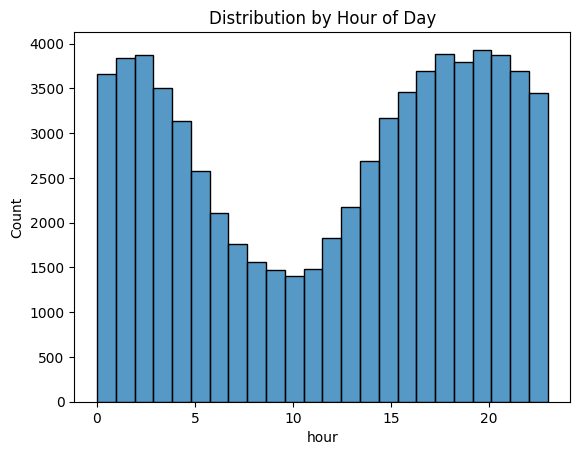

In [25]:
if 'created_utc' in df1.columns:
    df1['created_dt'] = pd.to_datetime(df1['created_utc'], unit='s')
    print(df1['created_dt'].describe())
    df1['hour'] = df1['created_dt'].dt.hour
    sns.histplot(df1['hour'], bins=24)
    plt.title('Distribution by Hour of Day')
    plt.show()

#### Second Dataset

count                            70000
mean     2019-01-16 17:37:54.563657216
min                2019-01-01 00:02:14
25%                2019-01-09 00:38:39
50%         2019-01-16 19:56:03.500000
75%                2019-01-24 08:00:15
max                2019-01-31 23:59:36
Name: created_dt, dtype: object


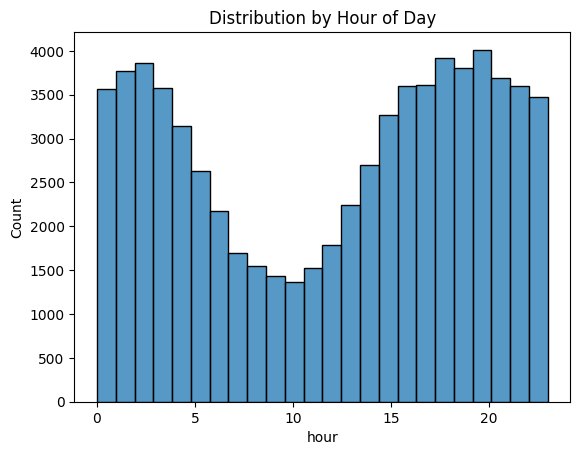

In [28]:
if 'created_utc' in df2.columns:
    df2['created_dt'] = pd.to_datetime(df2['created_utc'], unit='s')
    print(df2['created_dt'].describe())
    df2['hour'] = df2['created_dt'].dt.hour
    sns.histplot(df2['hour'], bins=24)
    plt.title('Distribution by Hour of Day')
    plt.show()

#### Third Dataset

count                            71225
mean     2019-01-16 17:28:14.078132992
min                2019-01-01 00:00:19
25%                2019-01-09 00:39:10
50%                2019-01-16 18:51:47
75%                2019-01-24 11:47:24
max                2019-01-31 23:59:36
Name: created_dt, dtype: object


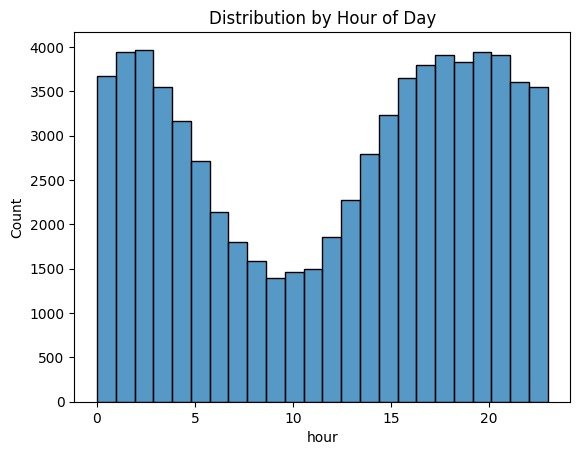

In [29]:
if 'created_utc' in df3.columns:
    df3['created_dt'] = pd.to_datetime(df3['created_utc'], unit='s')
    print(df3['created_dt'].describe())
    df3['hour'] = df3['created_dt'].dt.hour
    sns.histplot(df3['hour'], bins=24)
    plt.title('Distribution by Hour of Day')
    plt.show()

## Co-Occurance Heatmap

#### First Dataset

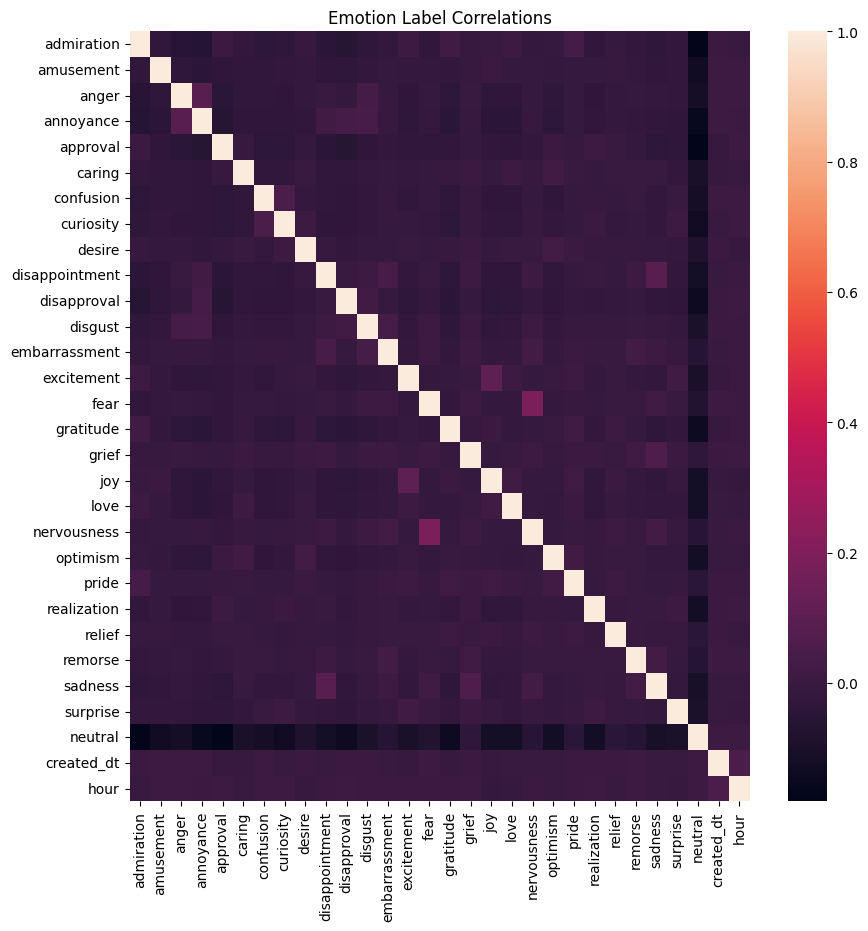

In [34]:
emotion_cols = df1.columns[df1.columns.get_loc('admiration'):]
corr = df1[emotion_cols].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr)
plt.title('Emotion Label Correlations')
plt.show()

#### Second Dataset

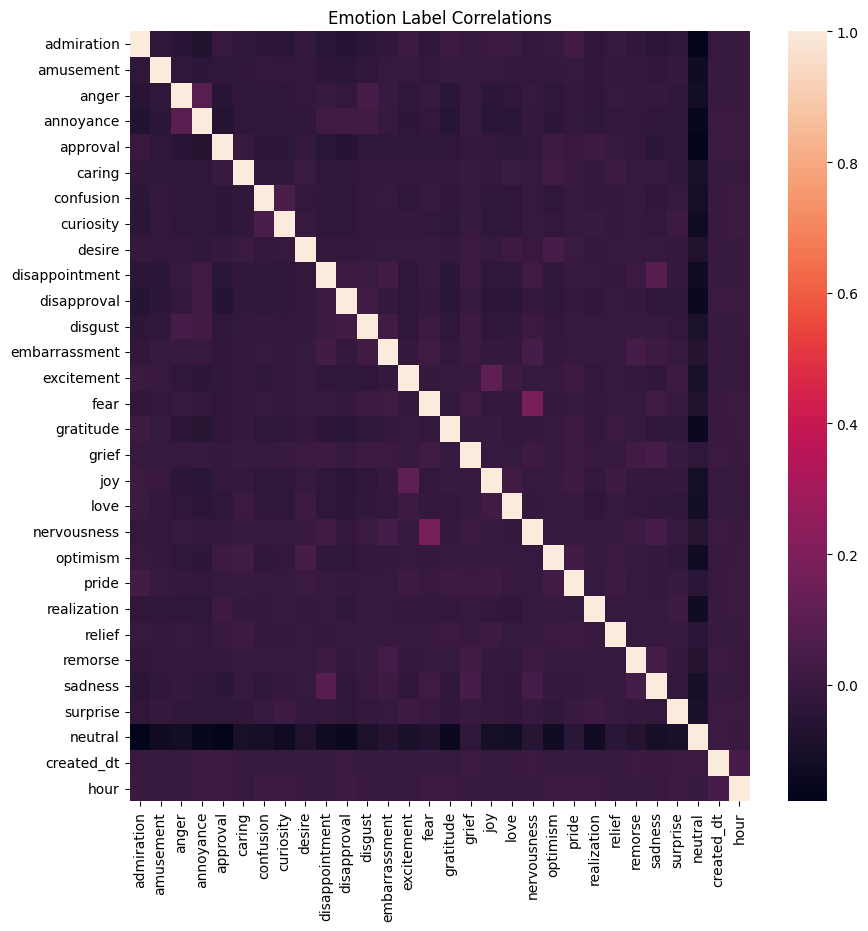

In [35]:
emotion_cols = df2.columns[df2.columns.get_loc('admiration'):]
corr = df2[emotion_cols].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr)
plt.title('Emotion Label Correlations')
plt.show()

#### Third Dataset

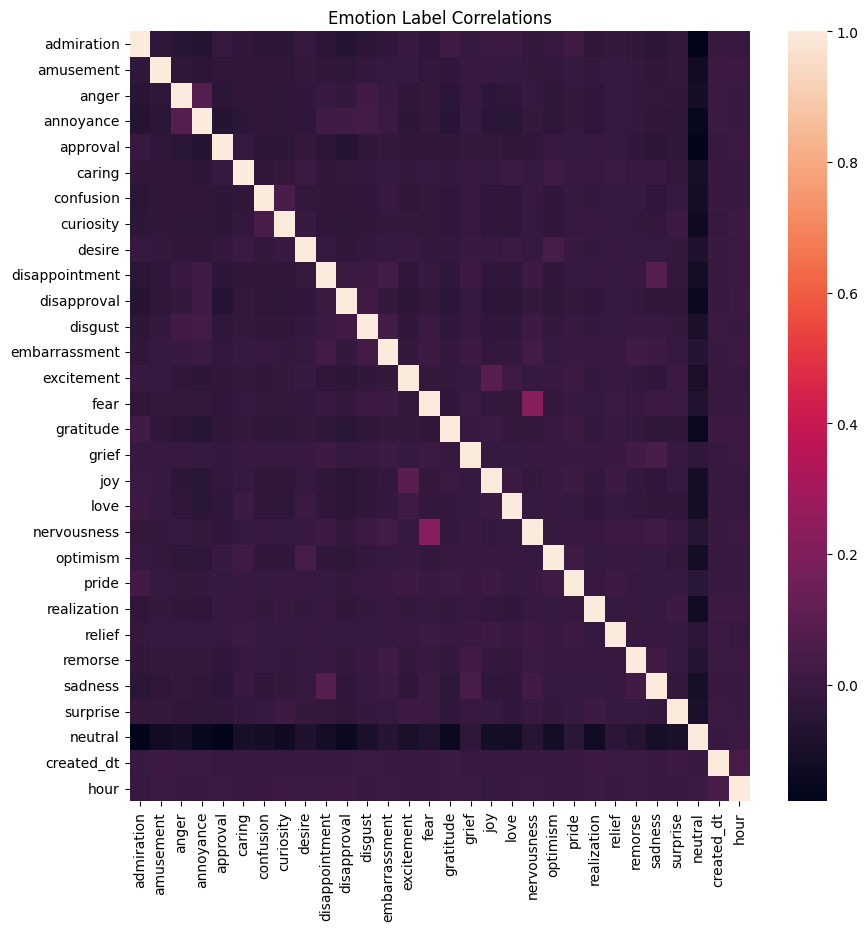

In [36]:
emotion_cols = df3.columns[df3.columns.get_loc('admiration'):]
corr = df3[emotion_cols].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr)
plt.title('Emotion Label Correlations')
plt.show()

## Top Emotion Combinations


#### First Dataset

In [37]:
combo_counts = df1[emotion_cols].apply(lambda x: tuple(x.index[x==1]), axis=1).value_counts().head(10)
print(combo_counts)

(neutral,)        17402
(approval,)        3583
(admiration,)      3231
(annoyance,)       2550
(disapproval,)     2411
(gratitude,)       2251
(amusement,)       1972
(curiosity,)       1858
(anger,)           1624
(confusion,)       1599
Name: count, dtype: int64


#### Second Dataset

In [38]:
combo_counts = df2[emotion_cols].apply(lambda x: tuple(x.index[x==1]), axis=1).value_counts().head(10)
print(combo_counts)

(neutral,)           17248
(approval,)           3497
(admiration,)         3403
(annoyance,)          2697
(disapproval,)        2417
(gratitude,)          2226
(amusement,)          1897
(curiosity,)          1830
(anger,)              1645
(disappointment,)     1535
Name: count, dtype: int64


#### Third Dataset

In [39]:
combo_counts = df3[emotion_cols].apply(lambda x: tuple(x.index[x==1]), axis=1).value_counts().head(10)
print(combo_counts)

(neutral,)        17612
(approval,)        3576
(admiration,)      3309
(annoyance,)       2667
(disapproval,)     2456
(gratitude,)       2232
(amusement,)       1936
(curiosity,)       1886
(anger,)           1674
(confusion,)       1569
Name: count, dtype: int64


## Text Analysis

#### First Dataset

count    70000.000000
mean        69.420757
std         36.589788
min          3.000000
25%         39.000000
50%         67.000000
75%         97.000000
max        703.000000
Name: text, dtype: float64


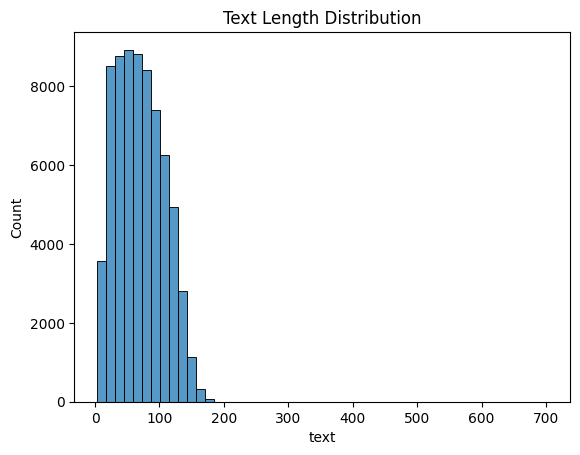

In [40]:
text_lengths = df1['text'].str.len()
print(text_lengths.describe())
sns.histplot(text_lengths, bins=50)
plt.title('Text Length Distribution')
plt.show()

#### Second Dataset

count    70000.000000
mean        69.426943
std         36.374463
min          2.000000
25%         39.000000
50%         67.000000
75%         97.000000
max        703.000000
Name: text, dtype: float64


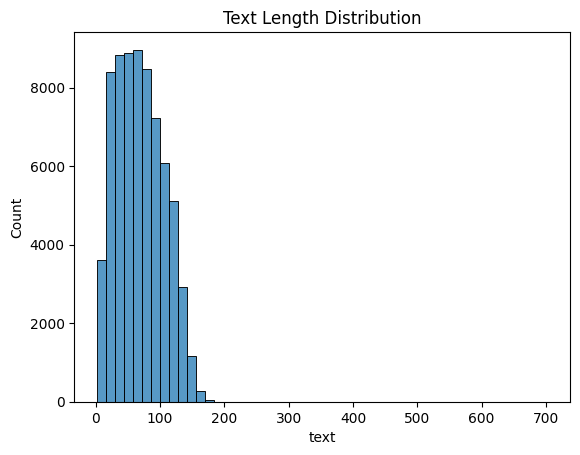

In [41]:
text_lengths = df2['text'].str.len()
print(text_lengths.describe())
sns.histplot(text_lengths, bins=50)
plt.title('Text Length Distribution')
plt.show()

#### Third Dataset

count    71225.000000
mean        69.055290
std         36.642843
min          2.000000
25%         39.000000
50%         66.000000
75%         96.000000
max        703.000000
Name: text, dtype: float64


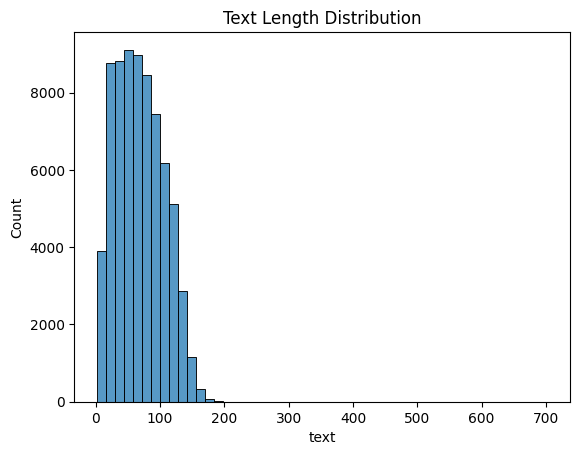

In [42]:
text_lengths = df3['text'].str.len()
print(text_lengths.describe())
sns.histplot(text_lengths, bins=50)
plt.title('Text Length Distribution')
plt.show()

## Class Imbalance Visulaization

#### First Dataset

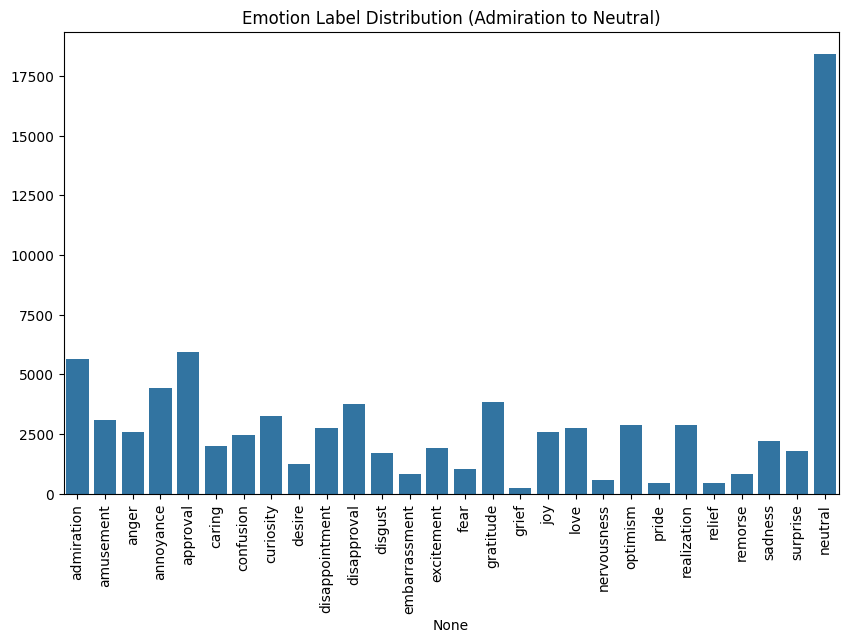

In [48]:
emotion_cols = df1.loc[:, 'admiration':'neutral'].columns
emotion_df = df1[emotion_cols].select_dtypes(include='number')

label_totals = emotion_df.sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=label_totals.index, y=label_totals.values, order=emotion_cols)
plt.xticks(rotation=90)
plt.title('Emotion Label Distribution (Admiration to Neutral)')
plt.show()

#### Second Dataset

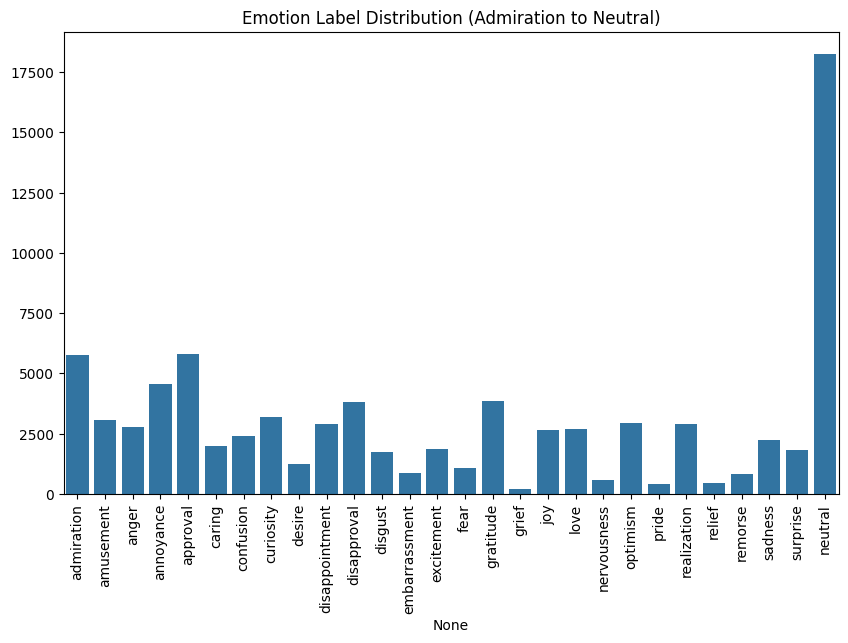

In [49]:
emotion_cols = df2.loc[:, 'admiration':'neutral'].columns
emotion_df = df2[emotion_cols].select_dtypes(include='number')

label_totals = emotion_df.sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=label_totals.index, y=label_totals.values, order=emotion_cols)
plt.xticks(rotation=90)
plt.title('Emotion Label Distribution (Admiration to Neutral)')
plt.show()

#### Third Dataset

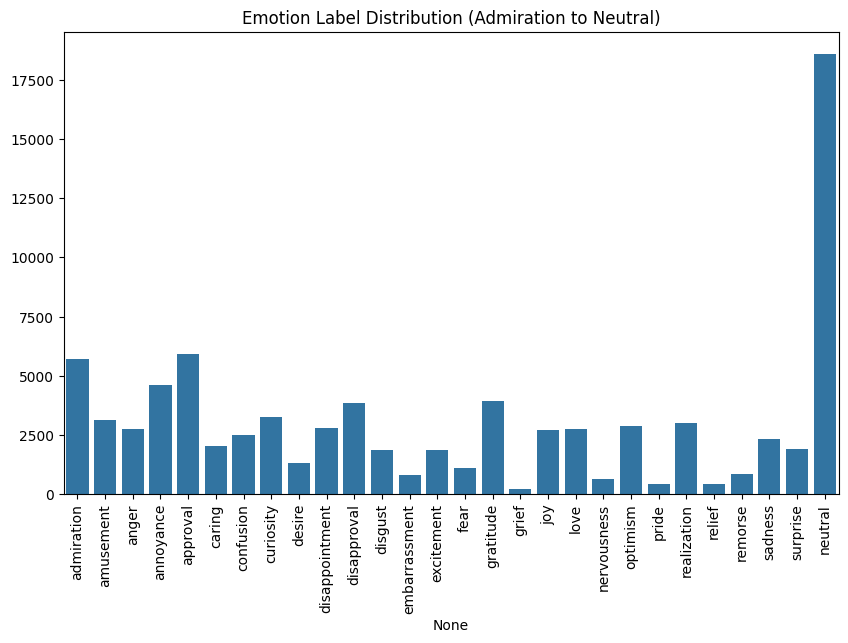

In [50]:
emotion_cols = df3.loc[:, 'admiration':'neutral'].columns
emotion_df = df3[emotion_cols].select_dtypes(include='number')

label_totals = emotion_df.sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=label_totals.index, y=label_totals.values, order=emotion_cols)
plt.xticks(rotation=90)
plt.title('Emotion Label Distribution (Admiration to Neutral)')
plt.show()

## Top Subreddits by Post Count

#### First Dataset

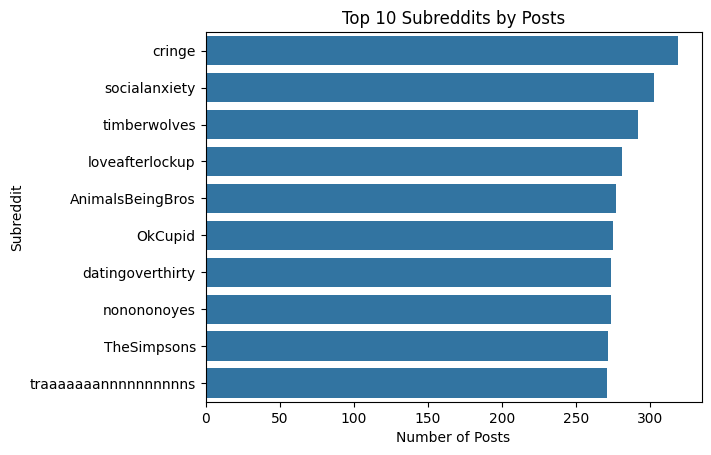

In [62]:
top_subs = df1['subreddit'].value_counts().head(10)
sns.barplot(y=top_subs.index, x=top_subs.values)
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.title('Top 10 Subreddits by Posts')
plt.show()

#### Second Dataset

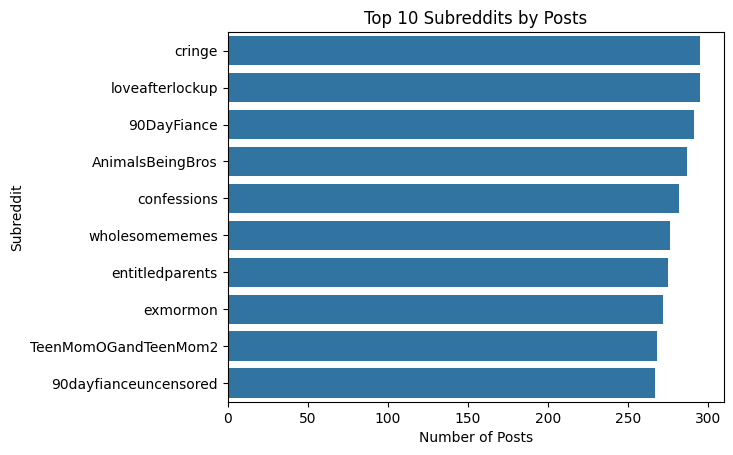

In [63]:
top_subs = df2['subreddit'].value_counts().head(10)
sns.barplot(y=top_subs.index, x=top_subs.values)
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.title('Top 10 Subreddits by Posts')
plt.show()

#### Third Dataset

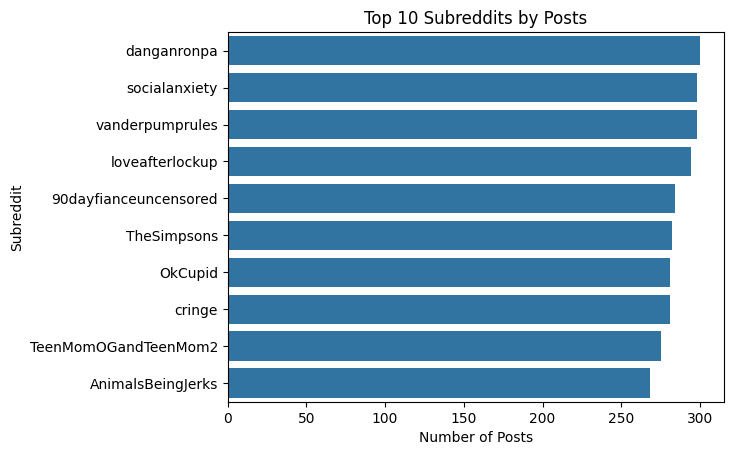

In [64]:
top_subs = df3['subreddit'].value_counts().head(10)
sns.barplot(y=top_subs.index, x=top_subs.values)
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.title('Top 10 Subreddits by Posts')
plt.show()

## Word Cloud Visualization for the Datasets

In [54]:
def plot_wordcloud(df, text_column, title, stopwords=None, max_words=200, bgcolor='white'):
    text = df[text_column].dropna().astype(str).str.cat(sep=' ')
    wordcloud = WordCloud(stopwords=stopwords, background_color=bgcolor, max_words=max_words, width=800, height=400).generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

stopwords = set(STOPWORDS)

#### First Dataset

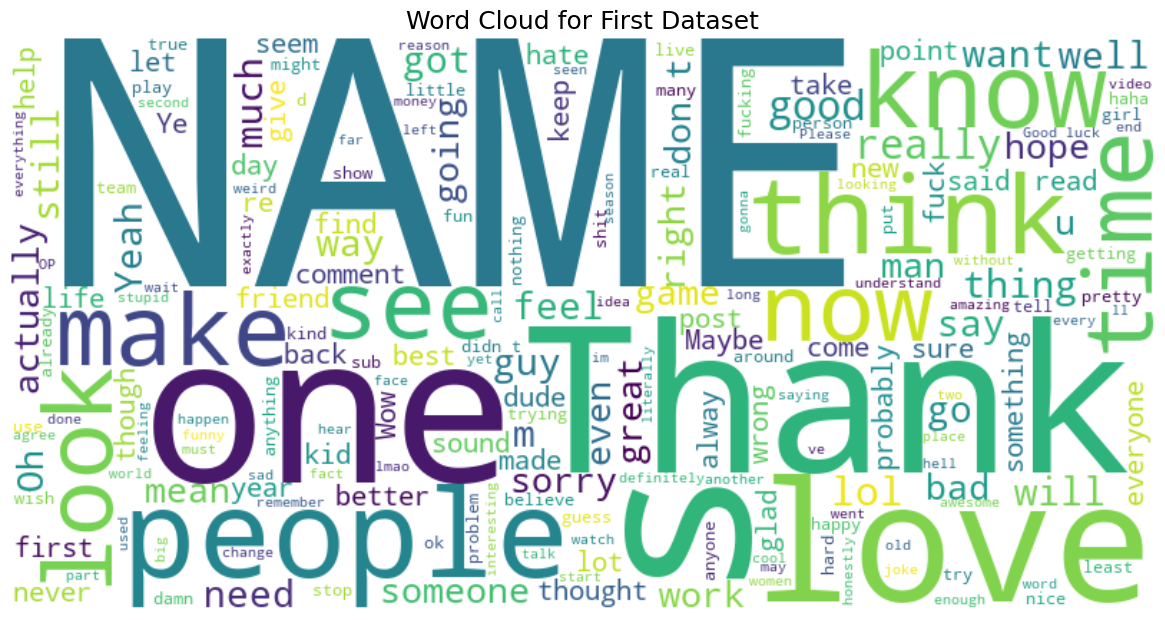

In [57]:
plot_wordcloud(df1, text_column='text', title='Word Cloud for First Dataset', stopwords=stopwords)

#### Second Dataset

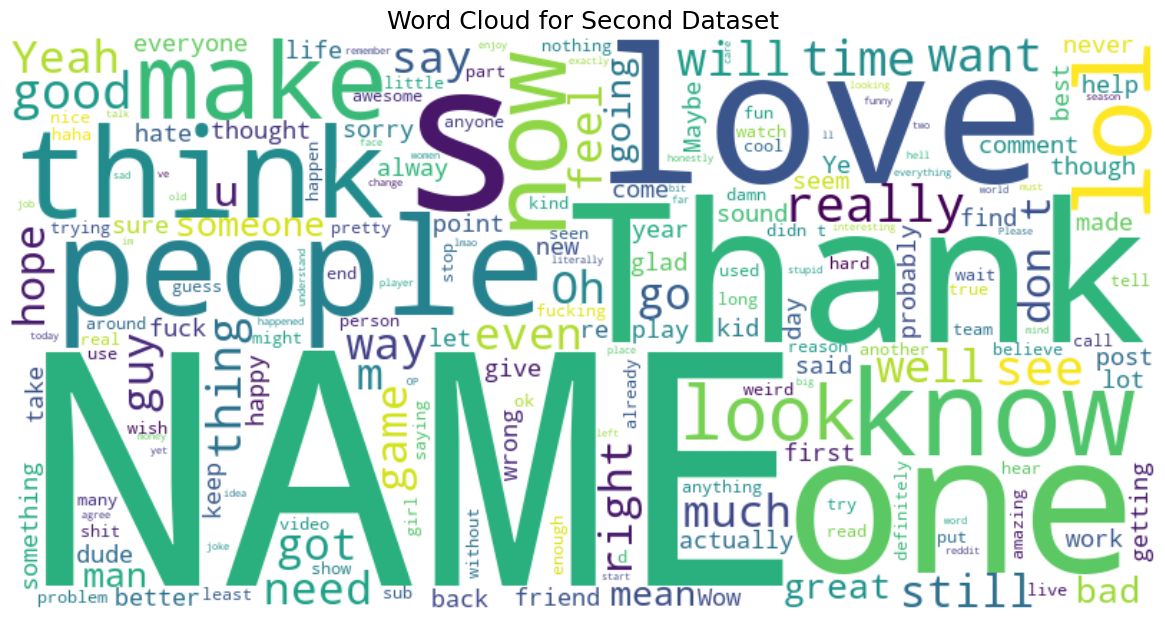

In [56]:
plot_wordcloud(df2, text_column='text', title='Word Cloud for Second Dataset', stopwords=stopwords)

#### Third Dataset

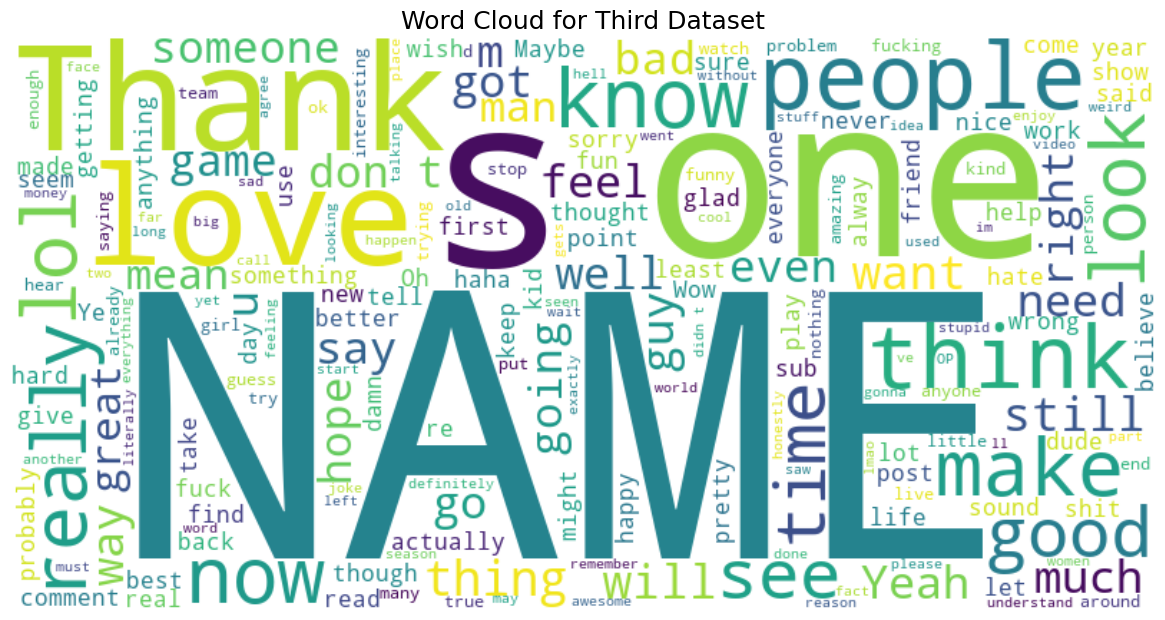

In [58]:
plot_wordcloud(df3, text_column='text', title='Word Cloud for Third Dataset', stopwords=stopwords)